In [1]:
import pandas as pd
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Root directory: change to where data downloaded to
root_dir = '/data2/jbaldwin/WCAS2023'

In [2]:
file = '/EXPOSED_VALUE/LitPop_pc_30arcsec_PHL.csv'

In [12]:
df = pd.read_csv(root_dir+file).drop('region_id',axis=1)
df.head()

,value,latitude,longitude
0,365.331980,8.054167,116.9625
1,2320.983172,8.045833,116.9625
2,3336.471193,8.037500,116.9625
3,3517.351404,8.029167,116.9625
4,4122.624744,8.020833,116.9625


In [13]:
xr = df.set_index(['latitude','longitude']).to_xarray()

In [16]:
xr = xr.rename({'latitude':'lat','longitude':'lon'})
xr['lat'].attrs={'units':'degrees', 'long_name':'Latitude'}
xr['lon'].attrs={'units':'degrees', 'long_name':'Longitude'}
xr['value'].attrs={'units':'2014 USD', 'long_name':'Asset Value'}

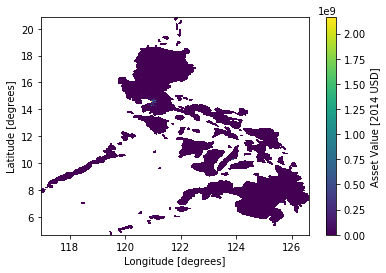

In [17]:
xr.value.plot()

In [20]:
xr.to_netcdf(root_dir+'/EXPOSED_VALUE/litpop_v1-2_phl.nc')